In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from PIL import Image
from ObjectDetectionModel import ObjectDectection

Using TensorFlow backend.


In [3]:
classes = ['n02165456', 'n02226429', 'n01644373', 'n02279972', 'n01632458', 'n02256656', 'n01774384', 'n01770393']
class_idx_to_name = {
    'n02165456': 'V. san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}

In [4]:
classes = ['n02165456', 'n02279972']
class_idx_to_name = {
    'n02165456': 'V. san antonio',
    'n02279972': 'mariposa',
}

In [5]:
image = Image.open('ladybugs_3.jpg')

In [6]:
n_classes = len(classes)
GRID_H,  GRID_W  = int(np.round(image.height / 32)) , int(np.round(image.width / 32))
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)
print(IMAGE_H, IMAGE_W)
BOX = 2

object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
model = object_detection.model

# model.load_weights('weights_yolo_loss_5_bboxes.hdf5') 
#model.load_weights('weights_yolo_loss_5_bboxes_random_idxs.hdf5') 
#model.load_weights('weights_yolo_loss_bigger_dataset_with_val.hdf5') 
model.load_weights('weights_yolo_2_bboxes_2_classes.hdf5') 
print(model.output)

416 640
Tensor("reshape_1/Reshape:0", shape=(?, 13, 20, 2, 7), dtype=float32)


In [7]:
image_array = np.array(image.resize([IMAGE_W,IMAGE_H])).reshape(1, IMAGE_H, IMAGE_W, 3)/255
predictions = model.predict(image_array)
from matplotlib import pyplot as plt

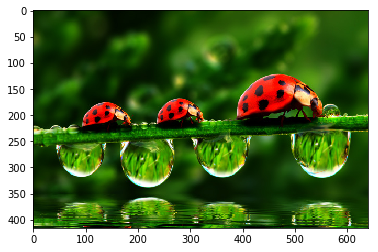

In [8]:
plt.imshow(image_array[0])
plt.show()

In [13]:
from ObjectDetectionEval import get_predictions
results_pred = get_predictions(predictions[0], classes, IMAGE_W, IMAGE_H, obj_conf_thres = 0.5, IOU_thres = 0.6)

In [14]:
from ObjectDetectionVisualization import add_bbox_to_image
def add_bboxes_to_image(image, results):
    image = image.copy()
    for class_id, v in results.items():
        for i,predicted_box in enumerate(v['bboxes']):
            add_bbox_to_image(image, 
                              predicted_box, 
                              class_id , 
                              class_idx_to_name, 
                              thickness=int(5*v['probs'][i]), bbox_type = 'PASCAL_VOC',
                              text=' ' + str(i)
                             )
    return image

In [222]:
len(annotations_val)

98

In [228]:
filenames = []
for ann in val_generator.annotations:
    filenames.append(ann['filename'])

In [230]:
len(filenames)

98

In [229]:
Counter(filenames).most_common()

[('ILSVRC2012_val_00037418', 1),
 ('ILSVRC2012_val_00036005', 1),
 ('ILSVRC2012_val_00035067', 1),
 ('ILSVRC2012_val_00005952', 1),
 ('ILSVRC2012_val_00046412', 1),
 ('ILSVRC2012_val_00047733', 1),
 ('ILSVRC2012_val_00023054', 1),
 ('ILSVRC2012_val_00017398', 1),
 ('ILSVRC2012_val_00046253', 1),
 ('ILSVRC2012_val_00034478', 1),
 ('ILSVRC2012_val_00018102', 1),
 ('ILSVRC2012_val_00025218', 1),
 ('ILSVRC2012_val_00021152', 1),
 ('ILSVRC2012_val_00006966', 1),
 ('ILSVRC2012_val_00001717', 1),
 ('ILSVRC2012_val_00026906', 1),
 ('ILSVRC2012_val_00023650', 1),
 ('ILSVRC2012_val_00019029', 1),
 ('ILSVRC2012_val_00049460', 1),
 ('ILSVRC2012_val_00020458', 1),
 ('ILSVRC2012_val_00012137', 1),
 ('ILSVRC2012_val_00007365', 1),
 ('ILSVRC2012_val_00040814', 1),
 ('ILSVRC2012_val_00046856', 1),
 ('ILSVRC2012_val_00016683', 1),
 ('ILSVRC2012_val_00018332', 1),
 ('ILSVRC2012_val_00039712', 1),
 ('ILSVRC2012_val_00043292', 1),
 ('ILSVRC2012_val_00046963', 1),
 ('ILSVRC2012_val_00031147', 1),
 ('ILSVRC2

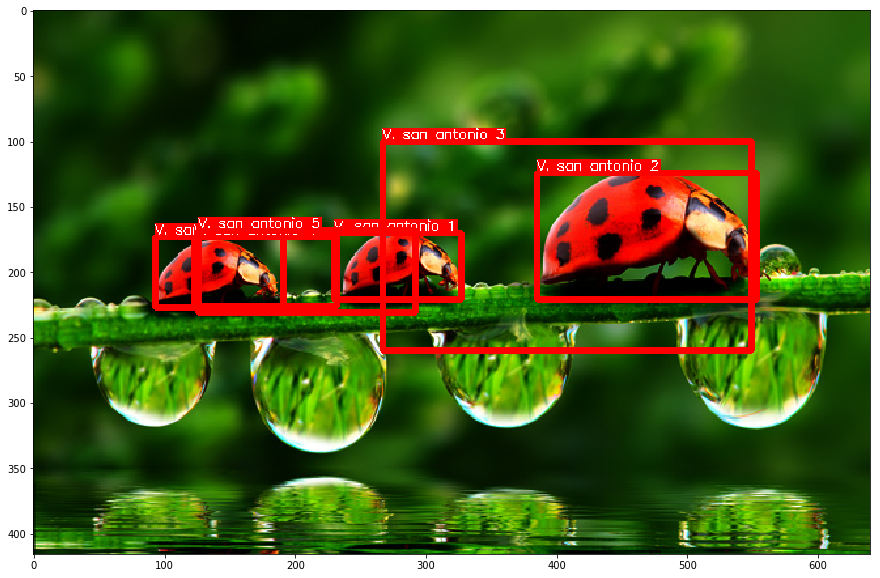

In [15]:
f, axs = plt.subplots(1,1, figsize=(20,10))
ax = axs
image = add_bboxes_to_image(image_array[0], results_pred)
ax.imshow(image)
plt.show()

In [17]:
results_pred

{'n02165456': {'bboxes': [array([ 93.29807186, 173.48801804, 191.57137966, 227.63816071]),
   array([230.47998428, 170.4621563 , 327.54969406, 221.96419334]),
   array([385.09110451, 124.12547874, 553.78994179, 221.74460411]),
   array([267.06640053, 100.51034164, 549.93969154, 260.93815231]),
   array([123.82080078, 173.49961567, 232.72667694, 226.62808323]),
   array([126.36401176, 168.98626614, 292.76243401, 231.10862637])],
  'probs': [0.9990877979224608,
   0.9987539888693723,
   0.9950469641579367,
   0.9494067844570963,
   0.8504152646383516,
   0.8281195307060591]},
 'n02279972': {'bboxes': [], 'probs': []}}

In [18]:
from ObjectDetectionEval import getIUO

# Testing with val generator fixed

In [19]:
n_classes = len(classes)
GRID_H,  GRID_W  = 10, 10
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)
print(IMAGE_H, IMAGE_W)

object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
model = object_detection.model
#model.load_weights('weights_yolo_loss_5_bboxes_random_idxs.hdf5') 
#model.load_weights('weights_yolo_loss_bigger_dataset.hdf5') 
#model.load_weights('weights_yolo_loss_bigger_dataset_with_val.hdf5') 
model.load_weights('weights_yolo_2_bboxes_2_classes.hdf5') 

320 320


In [20]:
from ObjectDetectionGenerator import get_train_val_annotations_split, ObjectDetectionGenerator

PASCAL_VOC_FOLDER = '/home/usuario/repos/Object_Localization/dataset/'
PASCAL_VOC_ANNOTATIONS_FOLDER_VAL = PASCAL_VOC_FOLDER + 'ILSVRC/Annotations/CLS-LOC/val'
PASCAL_VOC_IMAGES_FOLDER_VAL = PASCAL_VOC_FOLDER + 'ILSVRC/Data/CLS-LOC'

In [235]:
from ObjectDetectionEval import compare_with_annot

In [236]:
NUMBER_OF_BBOXES = BOX
_, annotations_val = get_train_val_annotations_split(PASCAL_VOC_ANNOTATIONS_FOLDER_VAL, \
                                                                     classes=classes, \
                                                                     MAX_NUMBER_OF_BBOXES_PER_CELL=NUMBER_OF_BBOXES, \
                                                                     split_ratio = 1., CLASSES_BY_DIR=False)

file 50000/50000
{'n02165456': 53, 'n02279972': 51}
found 98 images in 2 classes


{'n02165456': {'N': 1, 'TP': 1, 'FP': 0, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 1, 'FN': 0}}
ILSVRC2012_val_00011966


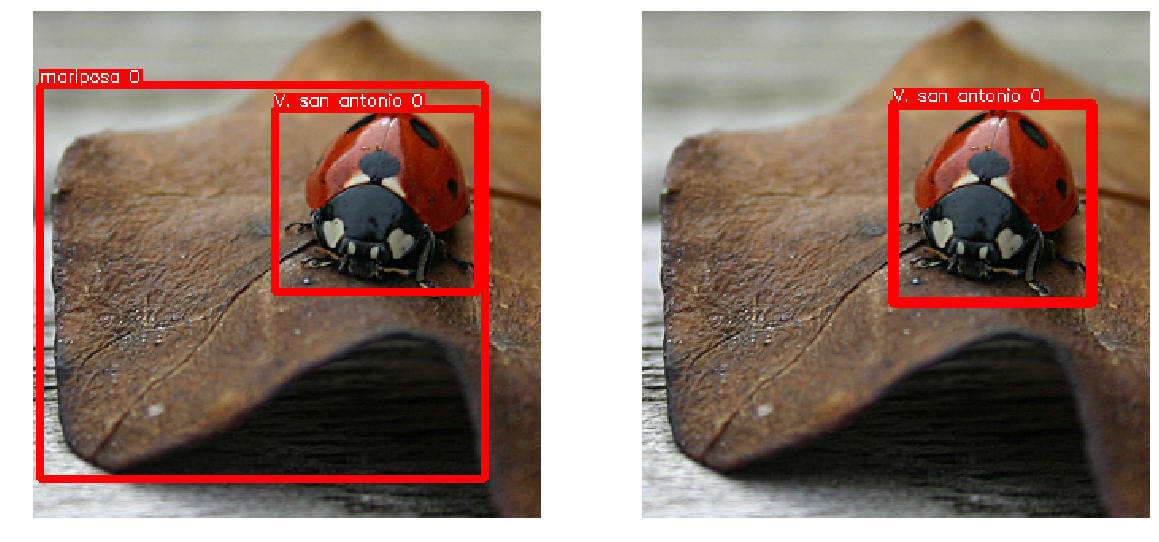

{'n02165456': {'N': 1, 'TP': 0, 'FP': 1, 'FN': 1}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00018332


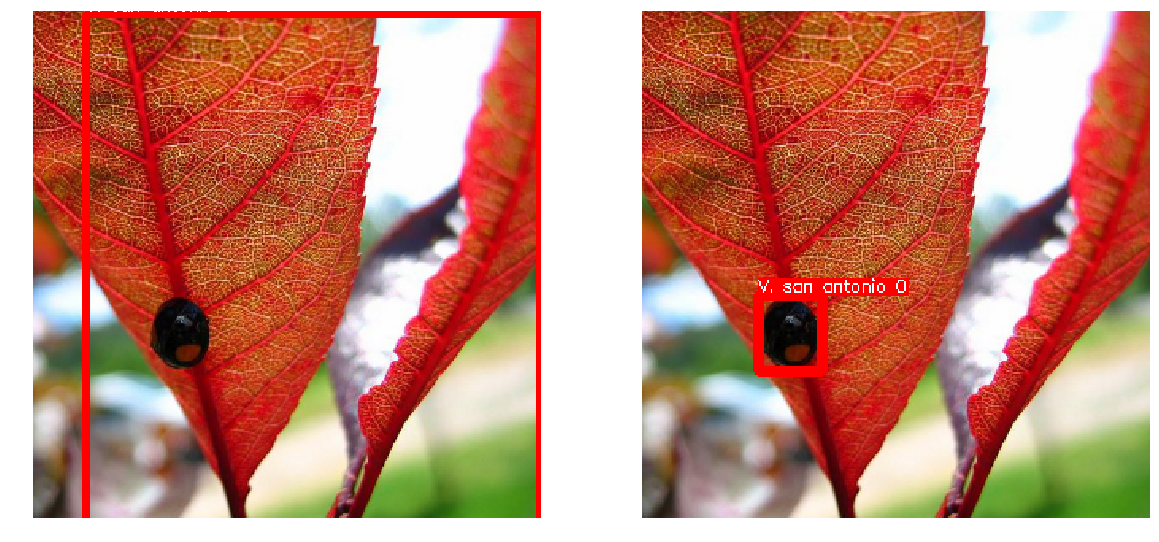

{'n02165456': {'N': 1, 'TP': 1, 'FP': 0, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 1, 'FN': 0}}
ILSVRC2012_val_00039712


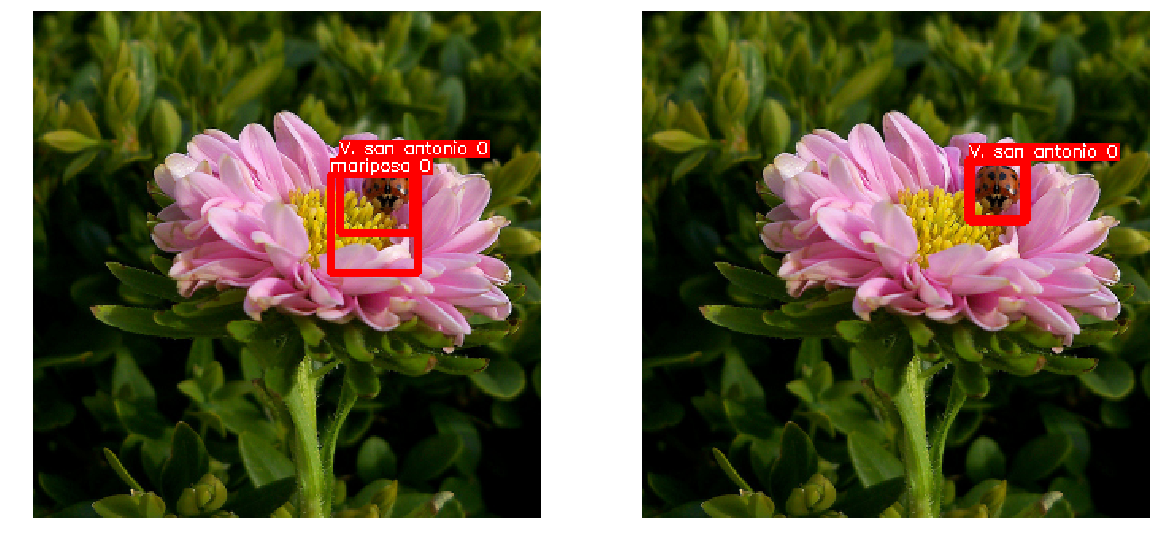

{'n02165456': {'N': 1, 'TP': 1, 'FP': 1, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00017398


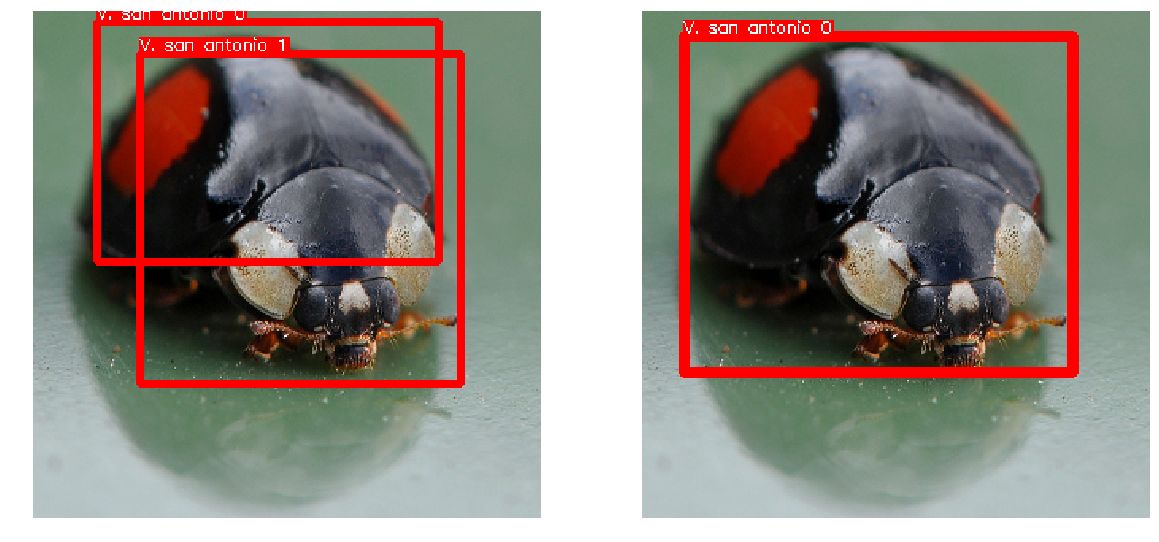

{'n02165456': {'N': 0, 'TP': 0, 'FP': 1, 'FN': 0}, 'n02279972': {'N': 1, 'TP': 0, 'FP': 3, 'FN': 1}}
ILSVRC2012_val_00046963


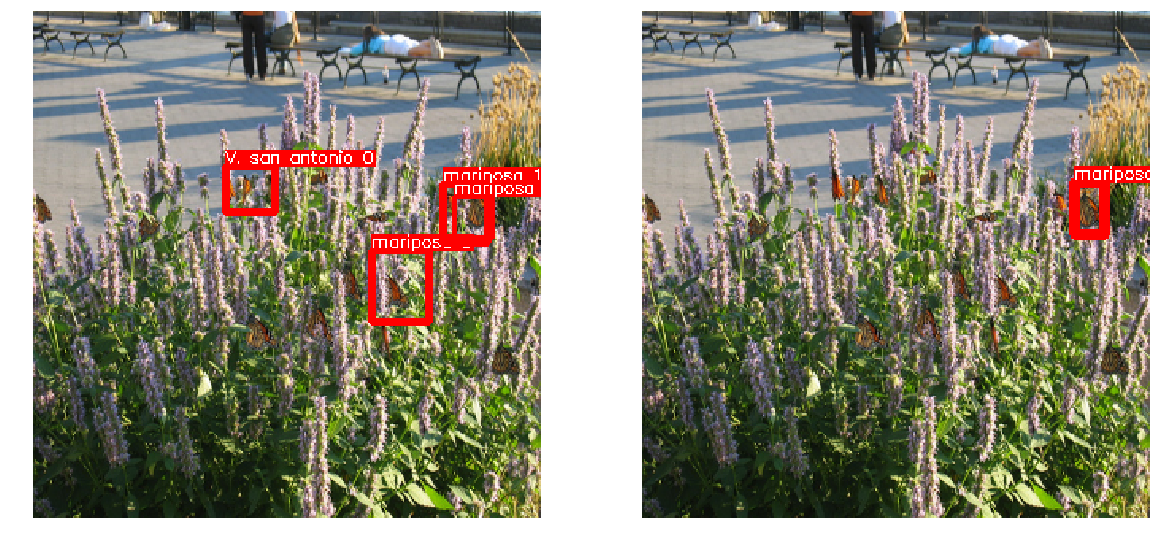

{'n02165456': {'N': 2, 'TP': 1, 'FP': 0, 'FN': 1}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00027557


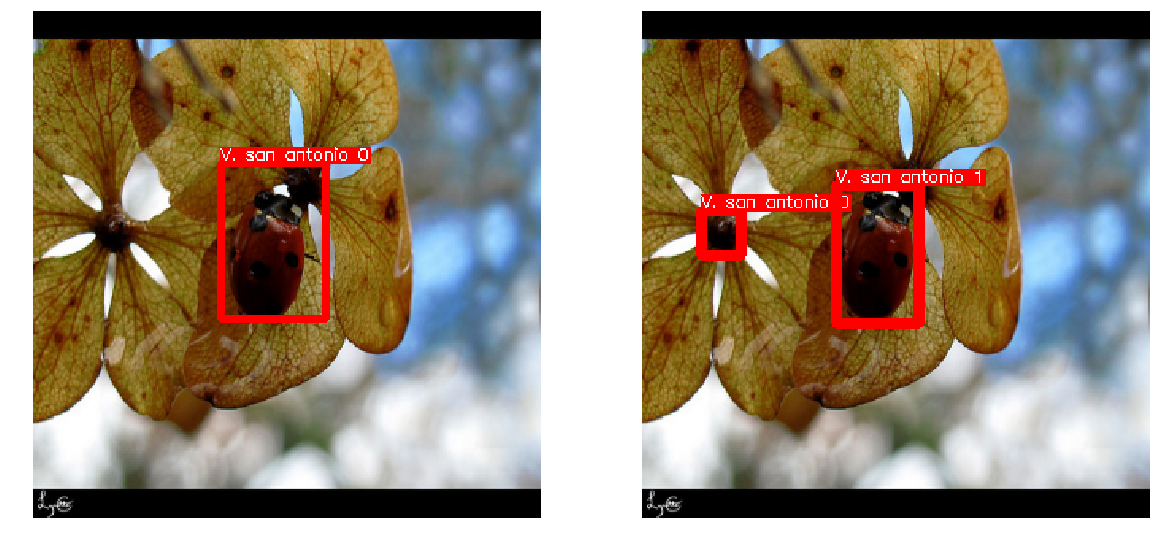

{'n02165456': {'N': 1, 'TP': 1, 'FP': 3, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00024507


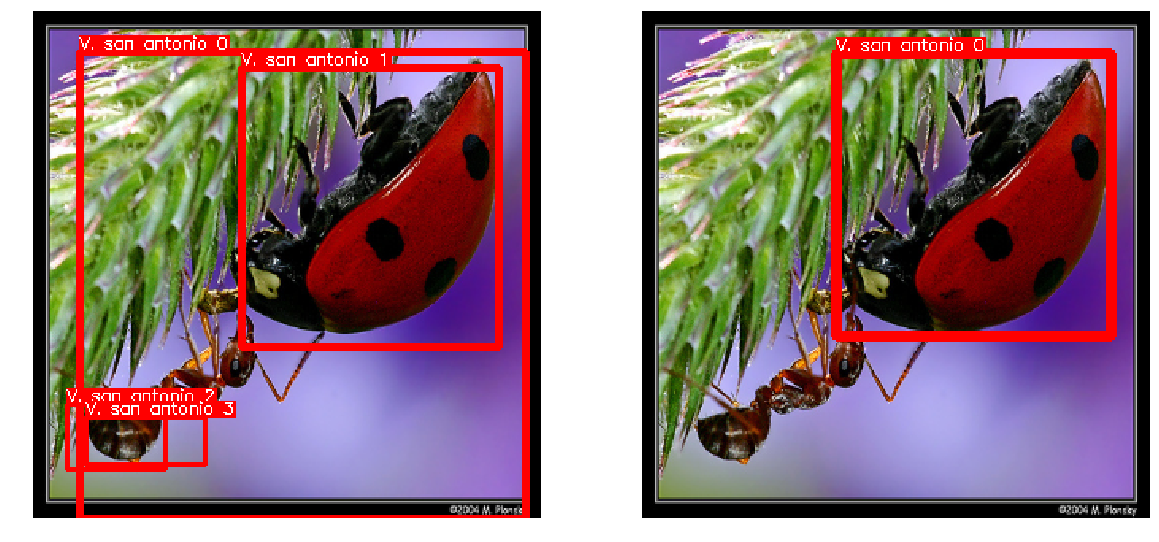

{'n02165456': {'N': 1, 'TP': 1, 'FP': 1, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00005343


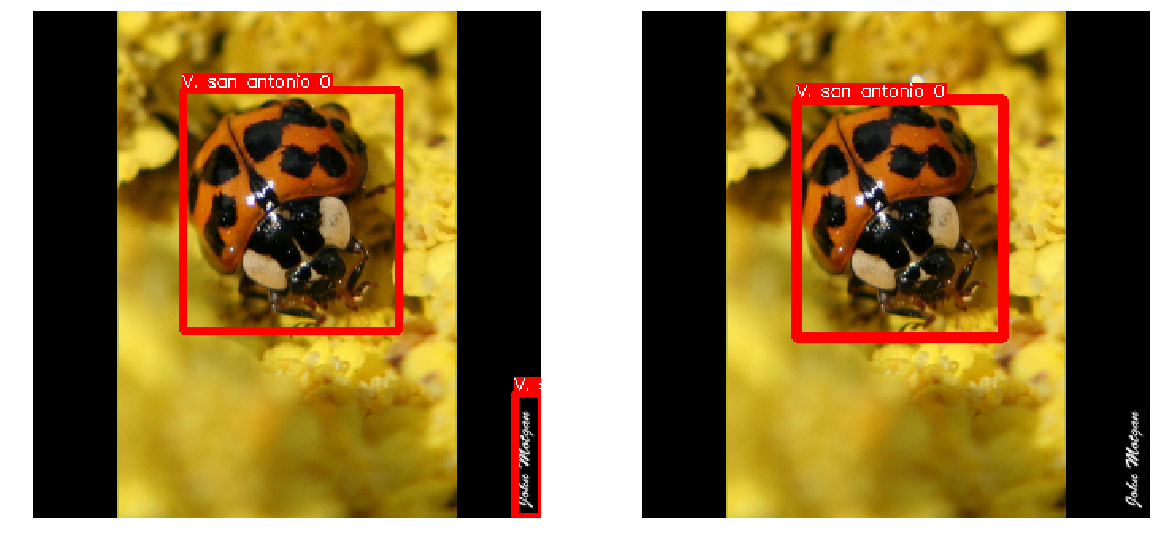

{'n02165456': {'N': 2, 'TP': 0, 'FP': 1, 'FN': 2}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00018142


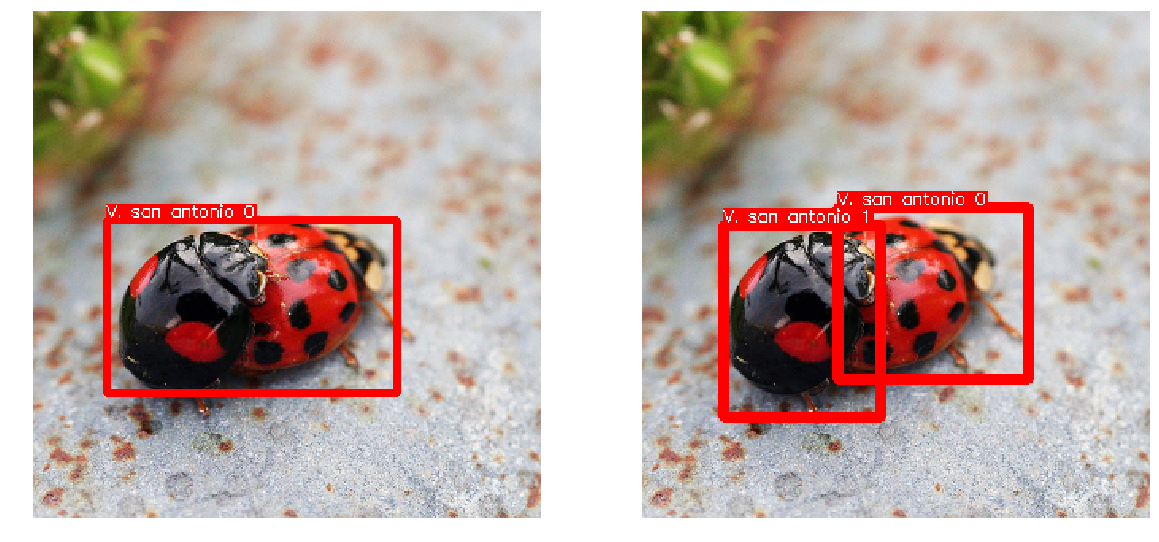

{'n02165456': {'N': 1, 'TP': 1, 'FP': 1, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00019299


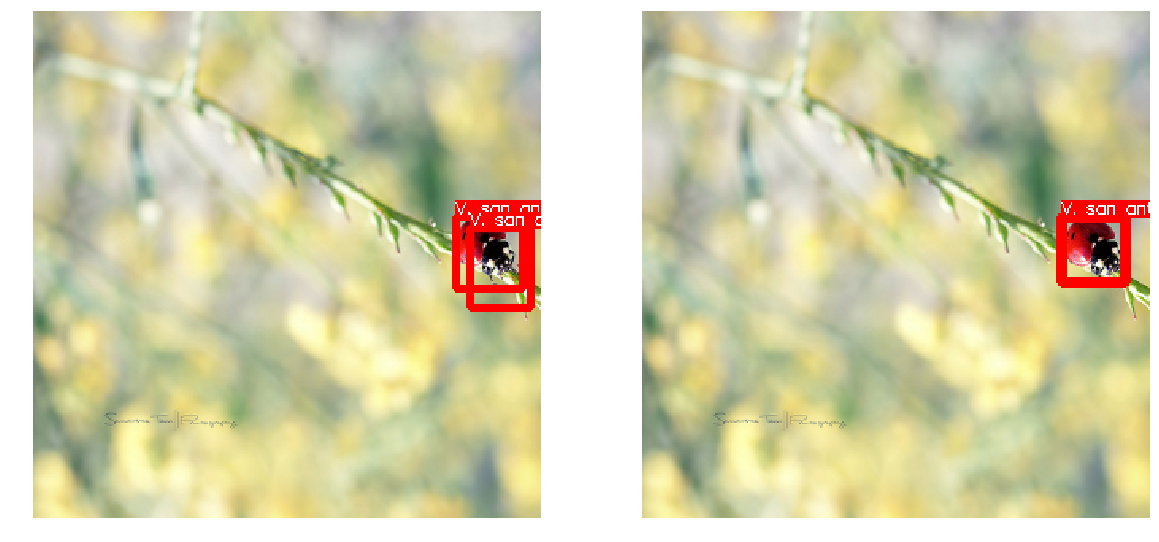

{'n02165456': {'N': 1, 'TP': 1, 'FP': 2, 'FN': 0}, 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}
ILSVRC2012_val_00030697


/home/usuario/repos/KerasObjectDetection/ObjectDetectionEval.py:56: RuntimeWarning: overflow encountered in exp
  intersection_bb = np.array([np.vstack([bb1[:,0], bb2[:,0]]).max(axis=0),


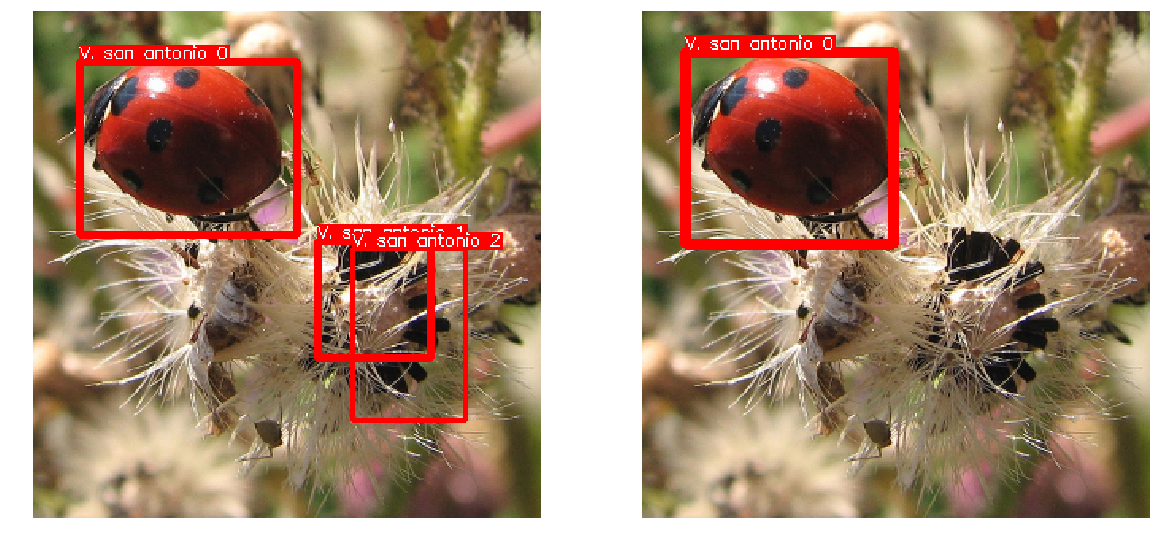

In [237]:
batch_size = 98
val_generator = ObjectDetectionGenerator(annotations_val, 
                                         PASCAL_VOC_IMAGES_FOLDER_VAL, 
                                         batch_size, 
                                         (IMAGE_H,IMAGE_W), 
                                         classes, NUMBER_OF_BBOXES, GRID_H, GRID_W,
                                         aument_data = False,
                                         shuffle = False
                                        )

images, batch_annotations = next(val_generator)
#images, batch_annotations = next(val_generator)
#images, batch_annotations = next(val_generator)
batch_predictions = model.predict_on_batch(images)
cols = 3
rows = int(np.ceil(batch_size / cols))
#f, axs = plt.subplots(rows, cols, figsize=(20, 6 * rows))
#axs = axs.flatten()
for i, prediction in enumerate(batch_predictions):
    pred_results = get_predictions(prediction, classes, IMAGE_W, IMAGE_H, obj_conf_thres = 0.5, IOU_thres = 0.5)
    annotation = batch_annotations[i]
    annot_results = get_predictions(annotation, classes, IMAGE_W, IMAGE_H, obj_conf_thres = 0.5, IOU_thres = 0.5, activations=True)
    comp_res = compare_with_annot(pred_results, annot_results, iou_thres = 0.5)
    show_it = False
    for class_idx in comp_res.keys():
        if comp_res[class_idx]['FN']>0 or comp_res[class_idx]['FP']>0:
            show_it = True
    if show_it:
        print(comp_res)
        #print(annot_results)
        #print()
        #print(pred_results)
        print(val_generator.annotations[i]['filename'])
        image_pred = add_bboxes_to_image(images[i], pred_results)
        image_annot = add_bboxes_to_image(images[i], annot_results)
        #image = add_bboxes_to_image(images[i], annot_results)
        f, ax = plt.subplots(1, 2, figsize=(20, 10))
        ax[0].imshow(image_pred)
        ax[0].set_axis_off()
        ax[1].imshow(image_annot)
        ax[1].set_axis_off()
        plt.show()

In [66]:
print(last_pred)
print(last_annot)

{'n02165456': {'bboxes': [array([ 93.84194183, 169.96845627, 146.63064575, 232.49586487]), array([120.89470673, 106.33968544, 191.9136734 , 165.52596855])], 'probs': [0.9968254984832724, 0.9713071219576652]}, 'n02279972': {'bboxes': [], 'probs': []}}
{'n02165456': {'bboxes': [array([118.62700229,  96.        , 205.76659039, 158.72      ]), array([ 92.99771167, 163.84      , 146.45308924, 230.4       ])], 'probs': [1.0, 1.0]}, 'n02279972': {'bboxes': [], 'probs': []}}


In [159]:
last_annot = {'n02165456': {'bboxes': [], 'probs': []}, 
              'n02279972': {'bboxes': [np.array([272.64      , 108.37333333, 291.84      , 141.65333333])], 
                            'probs': [1.0]}}

last_pred = {'n02165456': {'bboxes': [np.array([121.83552361,  98.3549614 , 152.55303192, 127.83685684])], 
                           'probs': [0.9973716644288537]}, 
             'n02279972': {'bboxes': [np.array([213.71231556, 151.73875141, 249.61121845, 196.40739155]), 
                                      np.array([258.52038383, 109.3976059 , 286.91423988, 146.51463318]), 
                                      np.array([265.91496468, 117.5152092 , 289.85923195, 143.83424759])], 
                           'probs': [0.6666561953140578, 0.6536204937526577, 0.5802609846867411]}}

In [164]:
compare_with_annot(last_pred, last_annot, iou_thres = 0.4)

{'n02165456': {'N': 0, 'TP': 0, 'FP': 1, 'FN': 0},
 'n02279972': {'N': 1, 'TP': 1, 'FP': 2, 'FN': 0}}

In [162]:

    #print(last_annot[class_idx]['bboxes'])
    #print(last_annot[class_idx])

{'n02165456': {'N': 2, 'TP': 2, 'FP': 0, 'FN': 0},
 'n02279972': {'N': 0, 'TP': 0, 'FP': 0, 'FN': 0}}

In [50]:
model.compile(loss=[
        object_detection.losses.YOLO_loss(k_classes = 1, k_bboxes = 1, k_no_object=0.5, k_object = 1)
        # "mse"
        ], 
              optimizer='adam',
              metrics=[object_detection.metrics.classes_accuracy(), 
                       object_detection.metrics.IOU(), 
                       object_detection.metrics.object_accuracy(),
                       object_detection.metrics.no_object_accuracy(),
                       object_detection.losses.focal_loss(),
                       object_detection.losses.bounding_box_mse(),
                       object_detection.losses.object_bin_cross_entropy_loss(),
                       object_detection.losses.no_object_bin_cross_entropy_loss()
                      ]
             )

batch_size = 60
val_generator = ObjectDetectionGenerator(annotations_val, 
                                         PASCAL_VOC_IMAGES_FOLDER_VAL, 
                                         batch_size, 
                                         (IMAGE_H,IMAGE_W), 
                                         classes, NUMBER_OF_BBOXES, GRID_H, GRID_W,
                                         aument_data = False
                                        )

metrics_values = model.evaluate_generator(val_generator)
for i, met in enumerate(metrics_values):
    print(model.metrics_names[i], ':', met)

loss : 0.84769023840244
classes_accuracy : 1.0
IOU : 0.8280078768730164
object_accuracy : 0.9216629060415121
no_object_accuracy : 0.9823533892631531
focal_loss : 0.043364180681797176
bounding_box_mse : 0.3644250539632944
object_bin_cross_entropy_loss : 0.4466452690271231
no_object_bin_cross_entropy_loss : 0.06502757551005253


In [51]:
import tensorflow as tf
from ObjectDetectionEval import sigmoid, softmax, getIUO, yolo_bbox_2_PASCAL_VOC
from keras import backend as K

In [52]:
annotations = np.zeros([val_generator.samples, GRID_H, GRID_W, BOX, 1 + 4 + n_classes])
predictions = np.zeros([val_generator.samples, GRID_H, GRID_W, BOX, 1 + 4 + n_classes])

In [53]:
samp_idx = 0
for i in range(len(val_generator)):
    images_batch, annotations_batch = next(val_generator)
    predictions_batch = model.predict(images_batch)
    annotations[samp_idx: samp_idx + annotations_batch.shape[0]] = annotations_batch
    predictions[samp_idx: samp_idx + predictions_batch.shape[0]] = predictions_batch
    samp_idx = samp_idx + annotations_batch.shape[0]

In [54]:
y_true = tf.constant(annotations, dtype='float32')
y_pred = tf.constant(predictions, dtype='float32')

In [55]:
class_acc = object_detection.metrics.classes_accuracy()(y_true, y_pred)
obj_acc = object_detection.metrics.object_accuracy()(y_true, y_pred)
iou_val = object_detection.metrics.IOU()(y_true, y_pred)

In [56]:
sess = tf.Session()
with sess.as_default():
    print(np.mean(obj_acc.eval()))
    print(np.mean(class_acc.eval()))
    print(np.mean(iou_val.eval()))

0.9137931
1.0
0.82804465


In [57]:
def object_accuracy(annotations, predictions):
    obj_indexes = np.where(annotations[:,:,:,:,0] == 1)
    return np.mean(predictions[obj_indexes][:,0]>0)

def class_accuracy(annotations, predictions):
    obj_indexes = np.where(annotations[:,:,:,:,0] == 1)
    return np.mean(np.argmax(annotations[obj_indexes][:,1:n_classes+1], axis=-1) == np.argmax(predictions[obj_indexes][:,1:n_classes+1], axis=-1))

In [58]:
def get_IOUs_enhanced(annotations, predictions):
    obj_indexes = np.where(annotations[:,:,:,:,0] == 1)
    IOUs_list = []
    for cl_idx in range(n_classes):
        #print('for class {}'.format(cl_idx))
        # Only annotations from class cl_idx 
        class_i_idx = np.where(annotations[obj_indexes][:, 1 + cl_idx] == 1)
        class_i_bboxes = annotations[obj_indexes][class_i_idx][:,n_classes+1:n_classes+1+4]
        bboxes_iou = np.zeros([len(class_i_bboxes), BOX])
        pred_classes = []
        for i in range(BOX):
            bboxes_indexes = (*obj_indexes[0:-1], i * np.ones(len(obj_indexes[0])).astype(int) )
            predicted_data = predictions[bboxes_indexes][class_i_idx]
            predicted_bboxes = predicted_data[:,n_classes+1:n_classes+1+4]
            predicted_class = np.argmax(predicted_data[:, 1: 1 + n_classes], axis = -1)
            predicted_class_prob = np.max(softmax(predicted_data[:, 1: 1 + n_classes]), axis = -1)
            predicted_obj_prob = sigmoid(predicted_data[:, 0])
            pred_classes.append(predicted_class)
            IOUs, _ = getIUO(class_i_bboxes, 
                             predicted_bboxes, 
                             from_center_to_box=True)
            bboxes_iou[:,i] = IOUs  #* (predicted_class == cl_idx) # * predicted_obj_prob * predicted_class_prob
        best_bbox_idxs = np.argmax(bboxes_iou, axis = 1)
        best_bbox_ious = np.max(bboxes_iou, axis = 1)
        IOUs_list = IOUs_list + list(best_bbox_ious)
    print(len(IOUs_list), IOUs_list[:10])
    return np.mean(IOUs_list)
%time get_IOUs_enhanced(annotations, predictions)

116 [0.8608100387643175, 0.9444306048926041, 0.8261769377787301, 0.930013569037369, 0.8077459148668957, 0.689941252555593, 0.8641104448169749, 0.8621297617561384, 0.8792392789536934, 0.891276104006541]
CPU times: user 966 µs, sys: 171 µs, total: 1.14 ms
Wall time: 905 µs


0.8317461742828518

In [61]:
from ObjectDetectionEval import get_IOUs_enhanced
get_IOUs_enhanced(annotations, predictions, n_classes, consider_class=True)

0.8317461742828517

In [62]:
annotations.shape[-2]

2

In [63]:
def get_IOUs_enhanced(annotations, predictions):
    obj_indexes = np.where(annotations[:,:,:,:,0] == 1)
    annotated_bboxes = annotations[obj_indexes][:][:,n_classes+1:n_classes+1+4]
    bboxes_iou = np.zeros([annotated_bboxes.shape[0], BOX])
    annotated_class = np.argmax(annotations[obj_indexes][:][:, 1: 1 + n_classes], axis = -1)
    bboxes_indexes = (*obj_indexes[0:-1],)
    predictions_filtered = predictions[bboxes_indexes]
    for i in range(BOX):
        predicted_data = predictions_filtered[:,i,:]
        predicted_bboxes = predicted_data[:,n_classes+1:n_classes+1+4]
        predicted_class = np.argmax(predicted_data[:, 1: 1 + n_classes], axis = -1)
        predicted_class_prob = np.max(softmax(predicted_data[:, 1: 1 + n_classes]), axis = -1)
        predicted_obj_prob = sigmoid(predicted_data[:, 0])
        IOUs, _ = getIUO(annotated_bboxes, 
                         predicted_bboxes, 
                         from_center_to_box=True)
        bboxes_iou[:,i] = IOUs  * (predicted_class == annotated_class) # * predicted_obj_prob * predicted_class_prob
    best_bbox_idxs = np.argmax(bboxes_iou, axis = 1)
    best_bbox_ious = np.max(bboxes_iou, axis = 1)
    return np.mean(best_bbox_ious)
%time get_IOUs_enhanced(annotations, predictions)

CPU times: user 679 µs, sys: 120 µs, total: 799 µs
Wall time: 598 µs


0.8317461742828517

In [737]:
bboxes_iou.shape

(515, 5)

In [76]:
from ObjectDetectionEval import get_predictions_before_NMS, getIUO

In [77]:
gt = get_predictions(annotation, classes, IMAGE_W, IMAGE_H, obj_conf_thres = 0.5, IOU_thres = 0.5, activations=True)
print(gt)

{'n02165456': {'bboxes': [], 'probs': []}, 'n02226429': {'bboxes': [], 'probs': []}, 'n01644373': {'bboxes': [], 'probs': []}, 'n02279972': {'bboxes': [array([ 93.44      ,  70.82666667, 189.44      , 279.04      ])], 'probs': [1.0]}, 'n01632458': {'bboxes': [], 'probs': []}, 'n02256656': {'bboxes': [], 'probs': []}, 'n01774384': {'bboxes': [], 'probs': []}, 'n01770393': {'bboxes': [], 'probs': []}}


In [78]:
pred = get_predictions(prediction, classes, IMAGE_W, IMAGE_H, obj_conf_thres = 0.5, IOU_thres = 0.5, activations=False)
print(pred)

{'n02165456': {'bboxes': [], 'probs': []}, 'n02226429': {'bboxes': [], 'probs': []}, 'n01644373': {'bboxes': [], 'probs': []}, 'n02279972': {'bboxes': [array([121.30805016, 116.2908287 , 206.74381828, 279.08634567])], 'probs': [0.9968922785058648]}, 'n01632458': {'bboxes': [], 'probs': []}, 'n02256656': {'bboxes': [], 'probs': []}, 'n01774384': {'bboxes': [], 'probs': []}, 'n01770393': {'bboxes': [], 'probs': []}}


In [79]:
for k, v in gt.items():
    print(k)
    for bbox_gt in v['bboxes']:
        for bbox_pred in pred[k]['bboxes']:
            IOU, _ = getIUO(np.array(bbox_gt).reshape(1,4), np.array(bbox_pred).reshape(1,4))
            print(IOU)

n02165456
n02226429
n01644373
n02279972
[0.4861503]
n01632458
n02256656
n01774384
n01770393
